In [ ]:
from google.colab import drive
import os
import pandas as pd

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.chdir('/content/drive/My Drive/CS3244 Project')
os.chdir('Dataset/')

In [ ]:
df = pd.read_csv('app_relabelled_cleaned.csv')
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,...,YEARS_EMPLOYED,YEARS_UNEMPLOYED,LONG_TERM_UNEMPLOYED,over_60,paid_pastdue_diff,number_of_months,target,MARRIAGE_STATUS,EDUCATION,WAY_OF_LIVING
0,5008804,1,1,1,0,360000.0,1,0,0,No Occupation Stated,...,12.443836,0.0,0,0,11,16,1,1,3,3
1,5008805,1,1,1,0,360000.0,1,0,0,No Occupation Stated,...,12.443836,0.0,0,0,10,15,1,1,3,3
2,5008806,1,1,1,0,112500.0,0,0,0,Security staff,...,3.106849,0.0,0,0,0,30,1,1,1,5
3,5008808,0,0,1,0,270000.0,0,1,1,Sales staff,...,8.358904,0.0,0,0,-2,5,1,0,1,5
4,5008809,0,0,1,0,270000.0,0,1,1,Sales staff,...,8.358904,0.0,0,0,0,5,1,0,1,5


# Data Engineering

## Split train test

In [ ]:
from sklearn import model_selection

x = df.drop('target', axis= 1)
y = df['target']
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.2, random_state = 42)
train = pd.concat([x_train, y_train], axis = 1)

## Exploring age variable

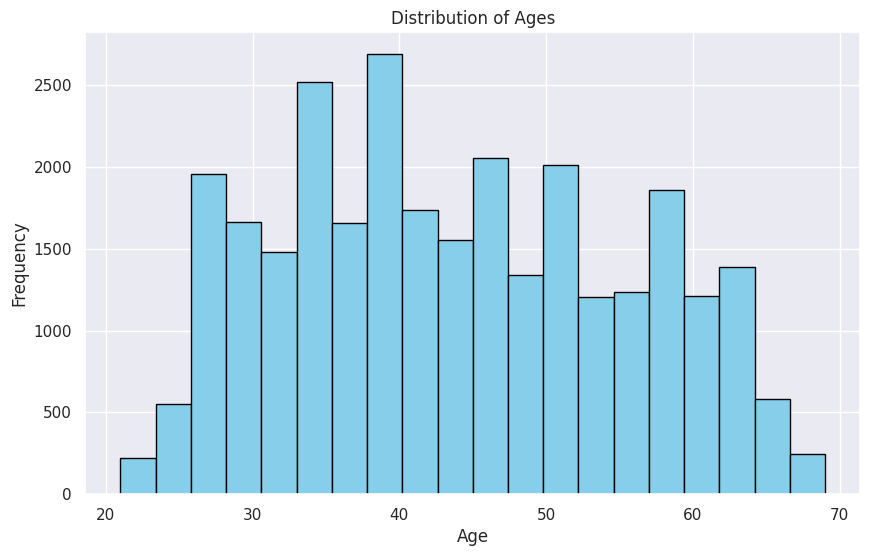

count    36451.000000
mean        43.777647
std         11.519756
min         21.000000
25%         34.000000
50%         43.000000
75%         53.000000
max         69.000000
Name: AGE, dtype: float64


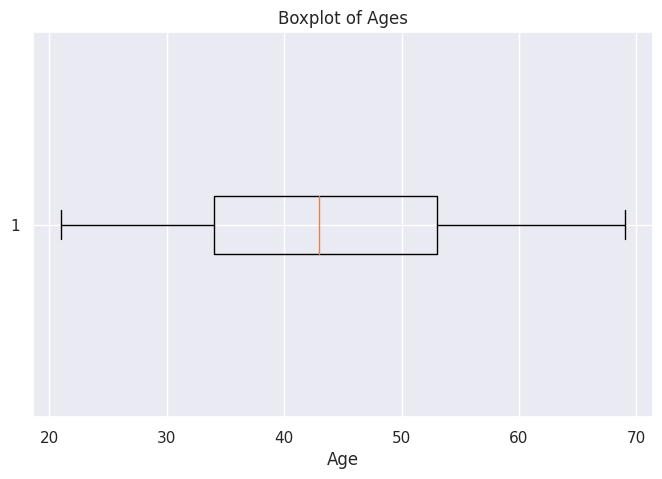

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot the distribution of ages
plt.figure(figsize=(10, 6))
plt.hist(train['AGE'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Analyze the distribution by printing summary statistics
print(df['AGE'].describe())

# You can also visualize the distribution using a boxplot
plt.figure(figsize=(8, 5))
plt.boxplot(df['AGE'], vert=False)
plt.title('Boxplot of Ages')
plt.xlabel('Age')
plt.grid(True)
plt.show()

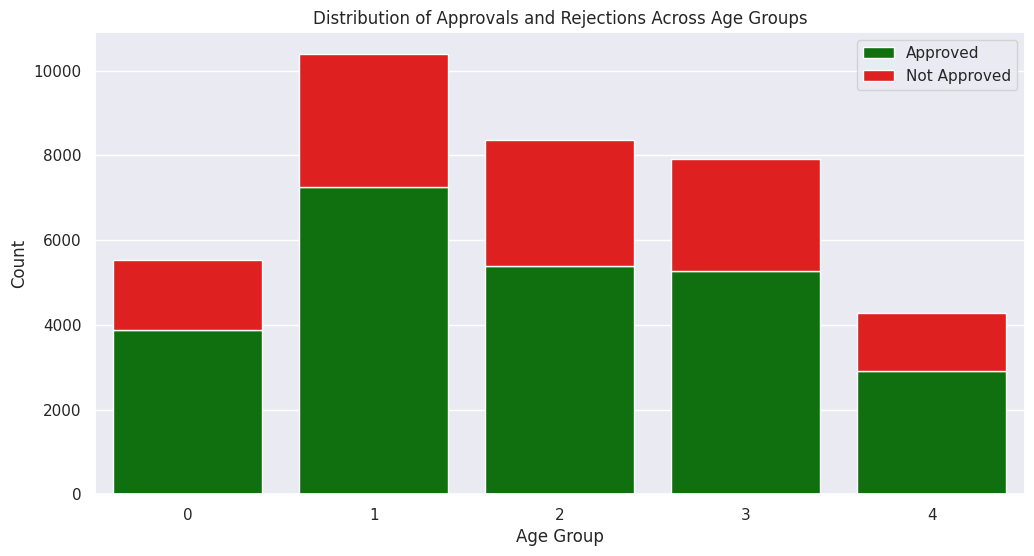

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define bins using equal-width approach
num_bins = 5
df['Age_Bin'] = pd.cut(df['AGE'], bins=num_bins, labels=False)

# Analyze credit approval rates across age groups
approval_counts = df.groupby(['Age_Bin', 'target']).size().unstack().fillna(0)

# Plot the credit approval rates
plt.figure(figsize=(12, 6))
sns.barplot(x=approval_counts.index, y=approval_counts[1], label='Approved', color='green')
sns.barplot(x=approval_counts.index, y=approval_counts[0], label='Not Approved', color='red', bottom=approval_counts[1])

plt.title('Distribution of Approvals and Rejections Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend()
plt.show()


In [ ]:
unique_age_bins = df['Age_Bin'].unique()

# Print the age ranges for each bin
for bin_idx in unique_age_bins:
    age_range = df[df['Age_Bin'] == bin_idx]['AGE']
    print(f'Age Bin {bin_idx}: {age_range.min()} - {age_range.max()} years')


Age Bin 1: 31.0 - 40.0 years
Age Bin 3: 50.0 - 59.0 years
Age Bin 4: 60.0 - 69.0 years
Age Bin 2: 41.0 - 49.0 years
Age Bin 0: 21.0 - 30.0 years


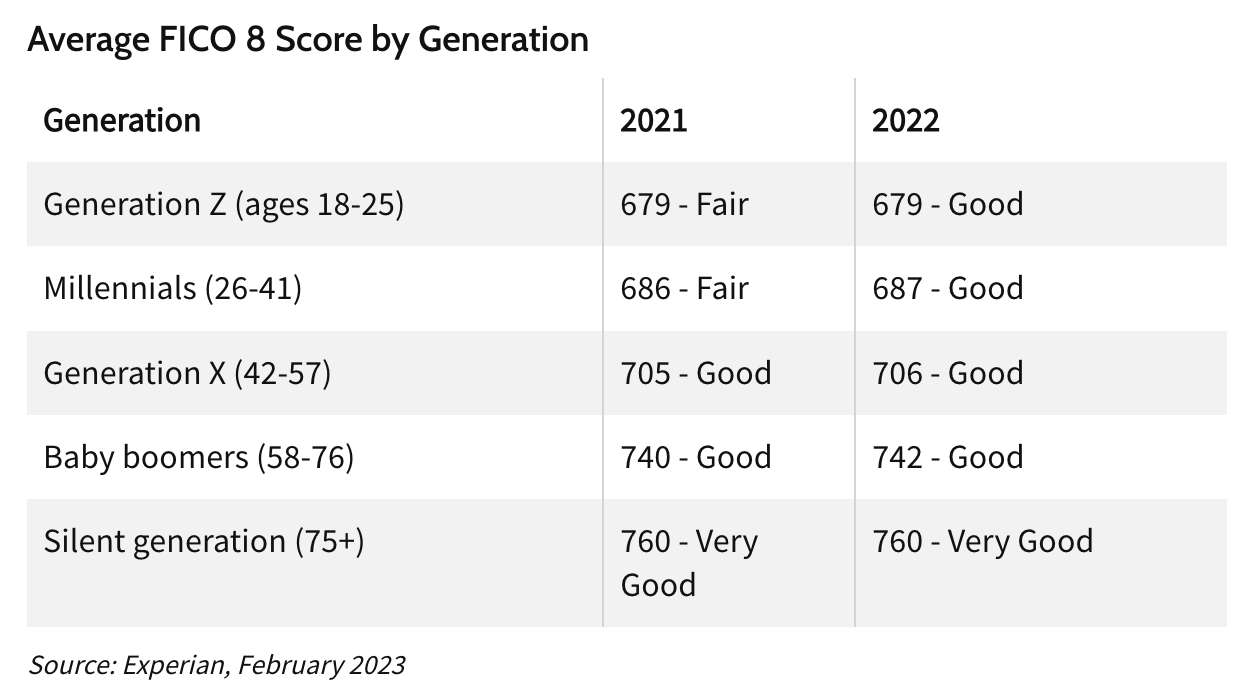

Age Bin 0: 21.0 - 32.0 years

Age Bin 1: 33.0 - 41.0 years

(42-76 should be split into more groups)

Age Bin 2: 42.0 - 47.0 years

Age Bin 3: 48.0 - 55.0 years

Age Bin 4: 55.0 - 69.0 years

In [ ]:
import pandas as pd

bins = [21.0, 33.0, 42.0, 48.0, 55.0, 69.0]
labels = ['0', '1', '2', '3', '4']

df['age_bins'] = pd.cut(df['AGE'], bins=bins, labels=labels, include_lowest=True)

In [ ]:
df['age_bins'].value_counts()

1    9644
0    8414
4    7354
3    5694
2    5345
Name: age_bins, dtype: int64

## Exploring other variables

In [ ]:
print(list(df.columns))

['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'AGE', 'EMPLOYED', 'YEARS_EMPLOYED', 'YEARS_UNEMPLOYED', 'LONG_TERM_UNEMPLOYED', 'over_60', 'paid_pastdue_diff', 'number_of_months', 'target', 'MARRIAGE_STATUS', 'EDUCATION', 'WAY_OF_LIVING', 'Age_Bin', 'age_bins']


In [ ]:
# 1. Ratio of years employed against age
df["RATIO_EMPLOYED"] = df["YEARS_EMPLOYED"]/df["AGE"]

# 2. Age_At_First_Employment
df['Age_At_First_Employment'] = df['AGE'] - df['YEARS_EMPLOYED']

# 3. Education Level Weighted by Income:
df['Education_Income_Weight'] = df['EDUCATION'] * df['AMT_INCOME_TOTAL']

# 4. Age and Number of Children Interaction:
df['Age_Children_Interaction'] = df['AGE'] * df['CNT_CHILDREN']

# 5. Debt to Income Ratio: Calculate the debt to income ratio by dividing the total debt (over_60) by the annual income.
df['debt_to_income_ratio'] = df['over_60'] / (df['AMT_INCOME_TOTAL'] / 12)  # Assuming 1 year has 12 months

# 6. Employment Stability: Create a binary feature indicating whether a person has stable employment (employed for more than 5 years) or not.
df['stable_employment'] = (df['YEARS_EMPLOYED'] > 5).astype(int)

# 7. Frequency Encoding by Occupation Type:
occupation_frequency = df['OCCUPATION_TYPE'].value_counts()
df['occupation_type_frequency'] = df['OCCUPATION_TYPE'].map(occupation_frequency)

# 8. Mean Income by Occupation Type:
occupation_mean_income = df.groupby('OCCUPATION_TYPE')['AMT_INCOME_TOTAL'].mean()
df['occupation_mean_income'] = df['OCCUPATION_TYPE'].map(occupation_mean_income)

# 9. Income by housing Percentile: Determine the income percentile of each individual within their housing type.
df['income_percentile_by_housing'] = df.groupby(['WAY_OF_LIVING'])['AMT_INCOME_TOTAL'].rank(pct=True)

In [ ]:
df['OCCUPATION_TYPE'].value_counts()

No Occupation Stated     11323
Laborers                  6211
Core staff                3591
Sales staff               3485
Managers                  3012
Drivers                   2135
High skill tech staff     1383
Accountants               1241
Medicine staff            1207
Cooking staff              655
Security staff             592
Cleaning staff             549
Private service staff      344
Low-skill Laborers         175
Waiters/barmen staff       173
Secretaries                151
HR staff                    85
Realty agents               79
IT staff                    60
Name: OCCUPATION_TYPE, dtype: int64

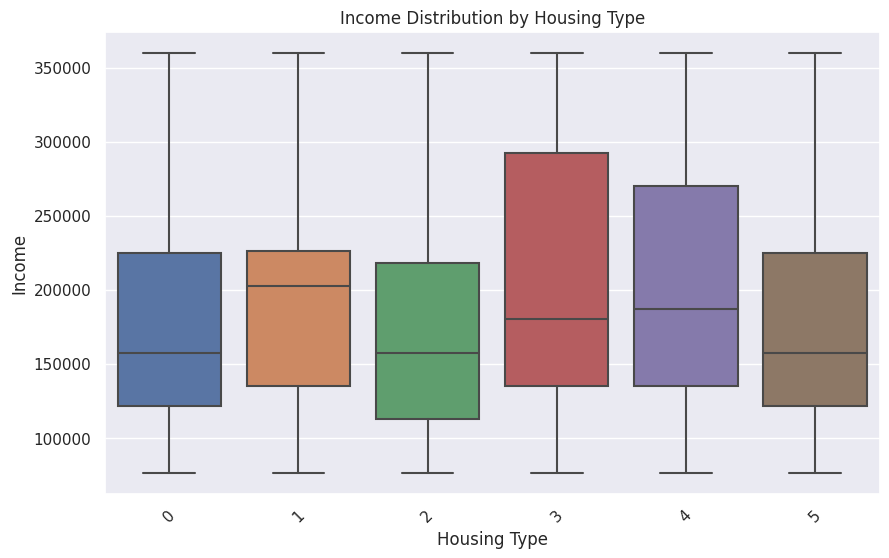

In [ ]:
import seaborn as sns

# Create a box plot or violin plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='WAY_OF_LIVING', y='AMT_INCOME_TOTAL', data=df)
plt.xlabel('Housing Type')
plt.ylabel('Income')
plt.title('Income Distribution by Housing Type')
plt.xticks(rotation=45)
plt.show()

## Scaling

In [ ]:
# SCALE all numerical, except binary columns
from sklearn.preprocessing import StandardScaler

# Identify numerical columns (excluding binary columns)
binary_columns = ['ID','CODE_GENDER', 'FLAG_OWN_CAR', 	'FLAG_OWN_REALTY','FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
                  'MARRIAGE_STATUS',	'EDUCATION',	'WAY_OF_LIVING', 'LONG_TERM_UNEMPLOYED', 'stable_employment', 'target']
numerical_columns = [col for col in df.select_dtypes(include=['number']).columns if col not in binary_columns]

numerical_df = df[numerical_columns]

# Initialize the StandardScaler
scaler = StandardScaler()
scaled_values = scaler.fit_transform(numerical_df)
df[numerical_columns] = scaled_values

In [ ]:
from sklearn import preprocessing
df['income_scaled'] = preprocessing.scale(df['AMT_INCOME_TOTAL'])

#select the int and float64 columns as the models below is only for non-categorical variables
df = df.select_dtypes(include=['int','float64'])

In [ ]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,...,RATIO_EMPLOYED,Age_At_First_Employment,Education_Income_Weight,Age_Children_Interaction,debt_to_income_ratio,stable_employment,occupation_type_frequency,occupation_mean_income,income_percentile_by_housing,income_scaled
0,5008804,1,1,1,-0.591602,2.288512,1,0,0,-0.218840,...,1.861780,-1.330133,3.067895,-0.582037,-0.066309,1,1.365404,-0.662794,1.597195,2.288512
1,5008805,1,1,1,-0.591602,2.288512,1,0,0,-0.218840,...,1.861780,-1.330133,3.067895,-0.582037,-0.066309,1,1.365404,-0.662794,1.597195,2.288512
2,5008806,1,1,1,-0.591602,-0.881179,0,0,0,-0.218840,...,-0.688870,1.359086,-0.745131,-0.582037,-0.066309,0,-1.290843,-0.403937,-1.057104,-0.881179
3,5008808,0,0,1,-0.591602,1.135897,0,1,1,-1.332317,...,0.160932,0.426679,-0.124406,-0.582037,-0.066309,1,-0.574738,-0.385452,1.218102,1.135897
4,5008809,0,0,1,-0.591602,1.135897,0,1,1,-1.332317,...,0.160932,0.426679,-0.124406,-0.582037,-0.066309,1,-0.574738,-0.385452,1.218102,1.135897


## Feature Selection

### Correlation Matrix

<Axes: >

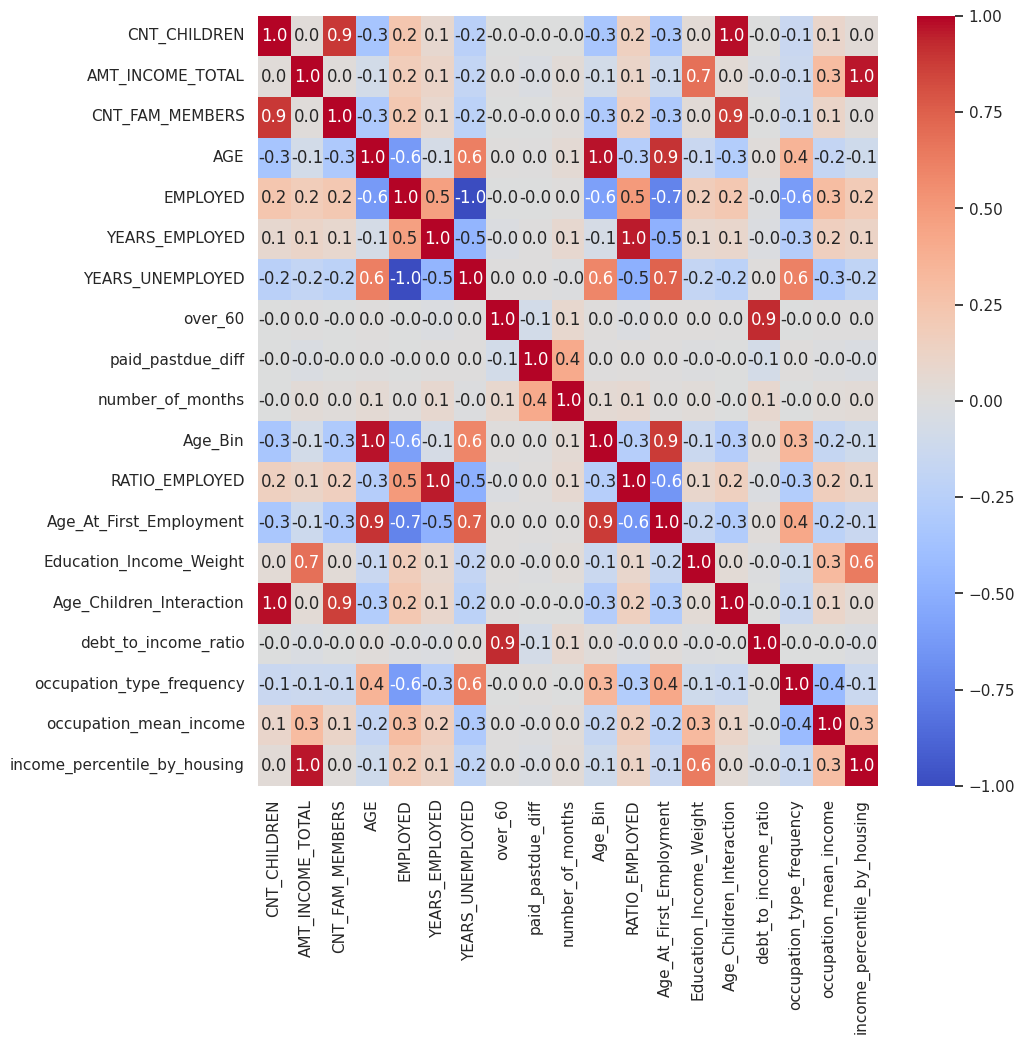

In [ ]:
# Correlation Matrix
numerical_columns = [col for col in df.select_dtypes(include=['number']).columns if col not in binary_columns]

corr_mat = numerical_df.corr()
sns.set (rc = {'figure.figsize':(10, 10)})
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".1f")

In [ ]:
import pandas as pd
import numpy as np

binary_columns = ['EMPLOYED','CODE_GENDER', 'FLAG_OWN_CAR', 	'FLAG_OWN_REALTY','FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
                  'MARRIAGE_STATUS',	'EDUCATION',	'WAY_OF_LIVING', 'LONG_TERM_UNEMPLOYED', 'stable_employment', 'target']
numerical_columns = [col for col in df.select_dtypes(include=['number']).columns if col not in binary_columns]

numerical_df = df[numerical_columns]

# Compute the correlation matrix
corr_matrix = numerical_df.corr().abs()

# Select the upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than a threshold (e.g., 0.8)
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

print(to_drop)

['CNT_FAM_MEMBERS', 'Age_Bin', 'RATIO_EMPLOYED', 'Age_At_First_Employment', 'Age_Children_Interaction', 'debt_to_income_ratio', 'income_percentile_by_housing', 'income_scaled']


<ipython-input-94-98c8f61d8250>:12: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [ ]:
# remove features with correlation score (>= 0.8)
df_dropCorr = df.drop(['Age_At_First_Employment','Education_Income_Weight','CNT_CHILDREN','CNT_FAM_MEMBERS', 'AGE', 'YEARS_EMPLOYED','AMT_INCOME_TOTAL','over_60'], axis = 1)

### Variance Threshold

In [ ]:
from sklearn.feature_selection import VarianceThreshold

cat_features = ['userId','timestamp_rated','tag','ml_title','tmdbId','cast','production_companies', 'release_date','genres_list',
                'crew','homepage','keywords','original_title','overview','overview_clean','status','tagline', 'combined_genres', 'overview_embedding']

df_numbinary = df_dropCorr
df_numbinary.replace([np.inf, -np.inf], np.nan, inplace=True)

# Assuming a threshold where a feature is removed if 95% of its values are the same
threshold = 0.05 * (1 - 0.05)
sel = VarianceThreshold(threshold=threshold)
reduced_features = sel.fit_transform(df_numbinary)
features_to_keep = sel.get_support(indices=True)
feature_names = df_numbinary.columns[features_to_keep]

feature_names

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'EMPLOYED',
       'YEARS_UNEMPLOYED', 'LONG_TERM_UNEMPLOYED', 'paid_pastdue_diff',
       'number_of_months', 'target', 'MARRIAGE_STATUS', 'EDUCATION',
       'WAY_OF_LIVING', 'Age_Bin', 'RATIO_EMPLOYED',
       'Age_Children_Interaction', 'debt_to_income_ratio', 'stable_employment',
       'occupation_type_frequency', 'occupation_mean_income',
       'income_percentile_by_housing', 'income_scaled'],
      dtype='object')

In [ ]:
all_features = df_numbinary.columns
drop_features = list(set(all_features) - set(feature_names))

df_reduced = df_dropCorr[all_features]
df_reduced.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,EMPLOYED,YEARS_UNEMPLOYED,LONG_TERM_UNEMPLOYED,...,WAY_OF_LIVING,Age_Bin,RATIO_EMPLOYED,Age_Children_Interaction,debt_to_income_ratio,stable_employment,occupation_type_frequency,occupation_mean_income,income_percentile_by_housing,income_scaled
0,5008804,1,1,1,1,0,0,0.449854,-0.449854,0,...,3,-0.691403,1.861780,-0.582037,-0.066309,1,1.365404,-0.662794,1.597195,2.288512
1,5008805,1,1,1,1,0,0,0.449854,-0.449854,0,...,3,-0.691403,1.861780,-0.582037,-0.066309,1,1.365404,-0.662794,1.597195,2.288512
2,5008806,1,1,1,0,0,0,0.449854,-0.449854,0,...,5,0.911085,-0.688870,-0.582037,-0.066309,0,-1.290843,-0.403937,-1.057104,-0.881179
3,5008808,0,0,1,0,1,1,0.449854,-0.449854,0,...,5,0.911085,0.160932,-0.582037,-0.066309,1,-0.574738,-0.385452,1.218102,1.135897
4,5008809,0,0,1,0,1,1,0.449854,-0.449854,0,...,5,0.911085,0.160932,-0.582037,-0.066309,1,-0.574738,-0.385452,1.218102,1.135897


## Split train test

In [ ]:
from sklearn import model_selection

x = df_reduced.drop('target', axis= 1)
y = df_reduced['target']
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.2, random_state = 42)
train = pd.concat([x_train, y_train], axis = 1)
test = pd.concat([x_test, y_test], axis=1)

In [ ]:
print(len(train))
print(len(test))

29160
7291


In [ ]:
x_train

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,EMPLOYED,YEARS_UNEMPLOYED,LONG_TERM_UNEMPLOYED,...,WAY_OF_LIVING,Age_Bin,RATIO_EMPLOYED,Age_Children_Interaction,debt_to_income_ratio,stable_employment,occupation_type_frequency,occupation_mean_income,income_percentile_by_housing,income_scaled
26581,5112852,0,0,1,0,0,0,0.449854,-0.449854,0,...,5,0.911085,1.850558,-0.582037,-0.066309,1,0.100029,-0.107140,0.256422,-0.016718
34610,5146327,0,0,1,0,0,0,-2.222945,2.222945,1,...,5,1.712329,-1.102871,-0.582037,-0.066309,0,1.365404,-0.662794,-1.635510,-1.342225
28293,5116019,0,1,1,0,1,0,-2.222945,2.222945,1,...,5,1.712329,-1.102871,-0.582037,-0.066309,0,1.365404,-0.662794,1.625014,2.288512
3197,5022817,1,1,1,0,0,0,0.449854,-0.449854,0,...,5,0.109841,-0.361813,-0.582037,-0.066309,0,-0.548500,0.130435,0.558324,0.271436
795,5009811,0,0,0,1,1,0,0.449854,-0.449854,0,...,5,-0.691403,1.095528,0.592727,-0.066309,1,-0.574738,-0.385452,0.558324,0.271436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16850,5067142,0,0,0,0,0,1,0.449854,-0.449854,0,...,0,-1.492647,0.480300,-0.582037,-0.066309,1,-0.574738,-0.385452,1.270722,0.847743
6265,5029193,0,0,1,0,0,0,0.449854,-0.449854,0,...,5,0.109841,2.506287,0.996552,-0.066309,1,-0.548500,0.130435,-0.559216,-0.593025
11284,5047710,0,0,1,1,1,0,0.449854,-0.449854,0,...,5,0.109841,0.343808,-0.582037,-0.066309,1,-0.691820,2.797118,-1.635510,-1.342225
860,5009886,0,0,1,0,1,0,-2.222945,2.222945,1,...,5,0.911085,-1.102871,-0.582037,-0.066309,0,1.365404,-0.662794,-0.111538,-0.304872


In [ ]:
# save datasets
train.to_csv('train_reduced.csv', index=False)
test.to_csv('test_reduced.csv', index=False)